## Car Price Cost Study - Linear Regression

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Business Goal 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.


## Step 1:  Importing and Understanding Data


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [3]:
# Importing Car Price Data
carprice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# Looking at the first five rows
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# make sure that number of duplicate rows are zero
sum(carprice.duplicated(subset = "car_ID")) == 0

True

In [6]:
#let's look at the dimensions of the dataframe
carprice.shape

(205, 26)

In [7]:
#Check for NA values in dataset
print (carprice.isnull().sum())  
print (carprice.isnull().values.any())
print (carprice.isnull().values.sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
False
0


In [8]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Preparation

In [10]:
#Splitting Car Name column on the basis of space to separate company and model name
new = carprice["CarName"].str.split(" ", n = 1, expand = True)

In [11]:
#Create new company column name
carprice["company"]= new[0]

In [12]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
#deleting car ID as this variable is of no use
#Deleting original Car Name column
carprice = carprice.drop(['car_ID', 'CarName'], axis=1)

In [14]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
# Correcting company name - For eg- maxda to mazda, porcshce to porsche, vokswagen, vw to volkswagen, Nissan to nissan & toyouta to toyota

carprice['company'] = carprice['company'].replace({'maxda':'mazda', 'porcshce':'porsche', 'vokswagen':'volkswagen', 'vw':'volkswagen', 'Nissan':'nissan', 'toyouta':'toyota' })

In [16]:
# Correcting fuel system name - For eg- mfi to mpfi, spdi to spfi
   
carprice['fuelsystem'] = carprice['fuelsystem'].replace({'mfi':'mpfi', 'spdi':'spfi' })

In [17]:
# Correcting engine type name - For eg- dohcv to dohc
   
carprice['enginetype'] = carprice['enginetype'].replace({'dohcv':'dohc'})

## Step 2: Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 5760x2880 with 0 Axes>

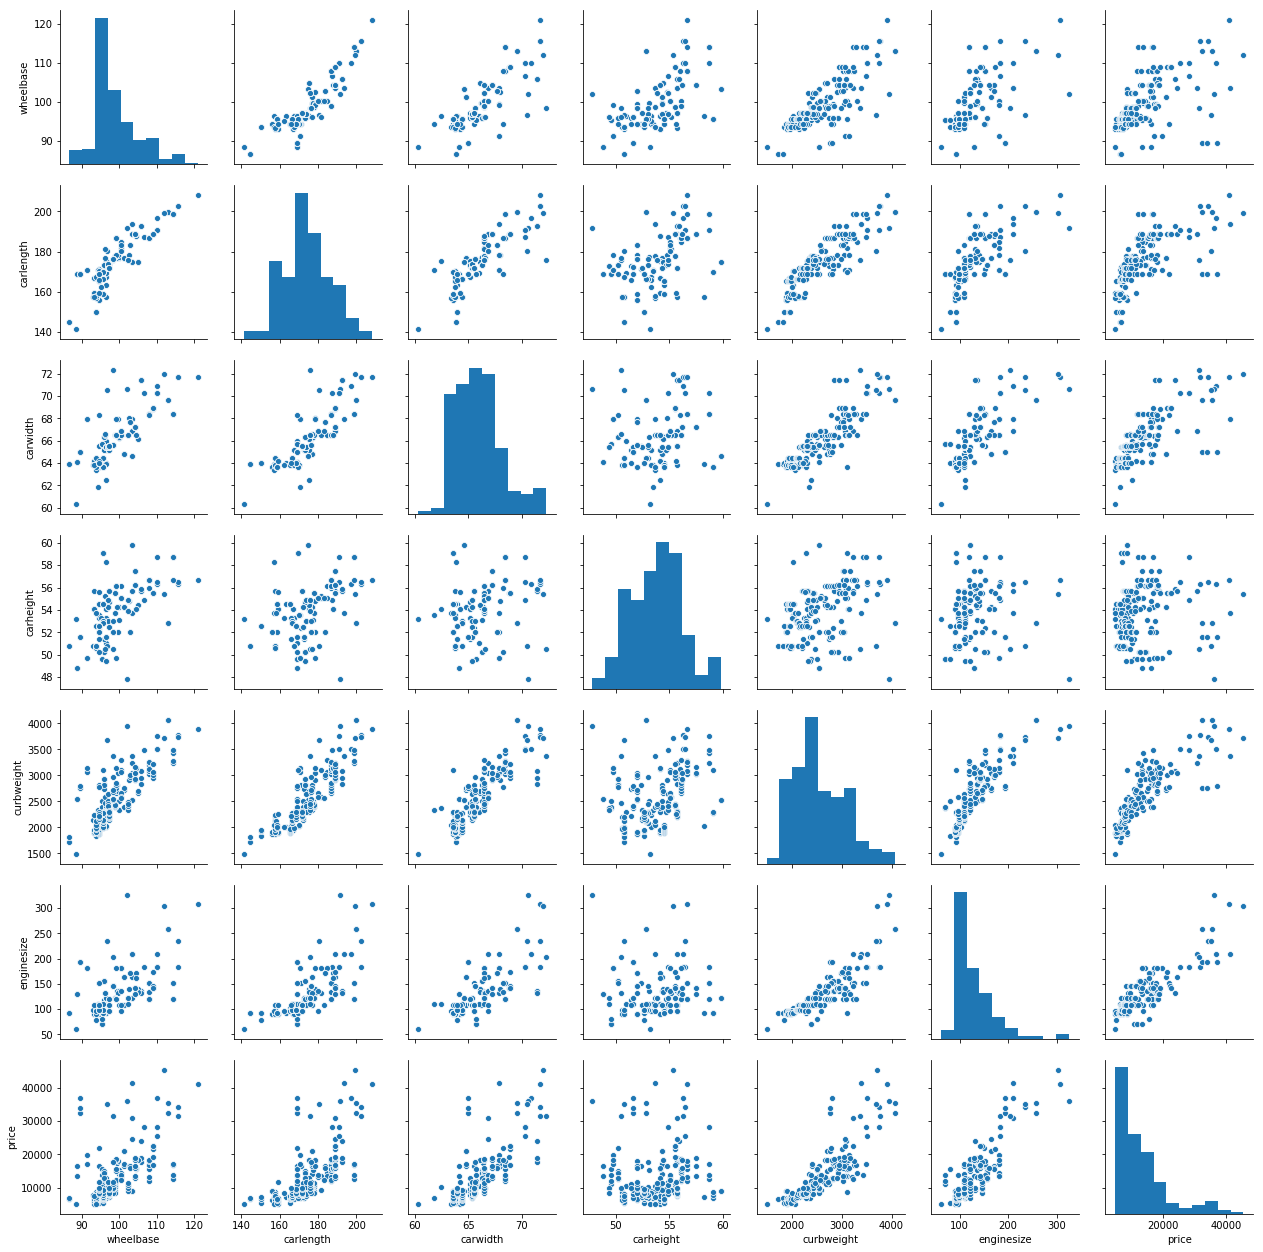

In [19]:
plt.figure(figsize=(80, 40))

num = carprice[["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "price"]]

sns.pairplot(num)
plt.show()

<Figure size 5760x2880 with 0 Axes>

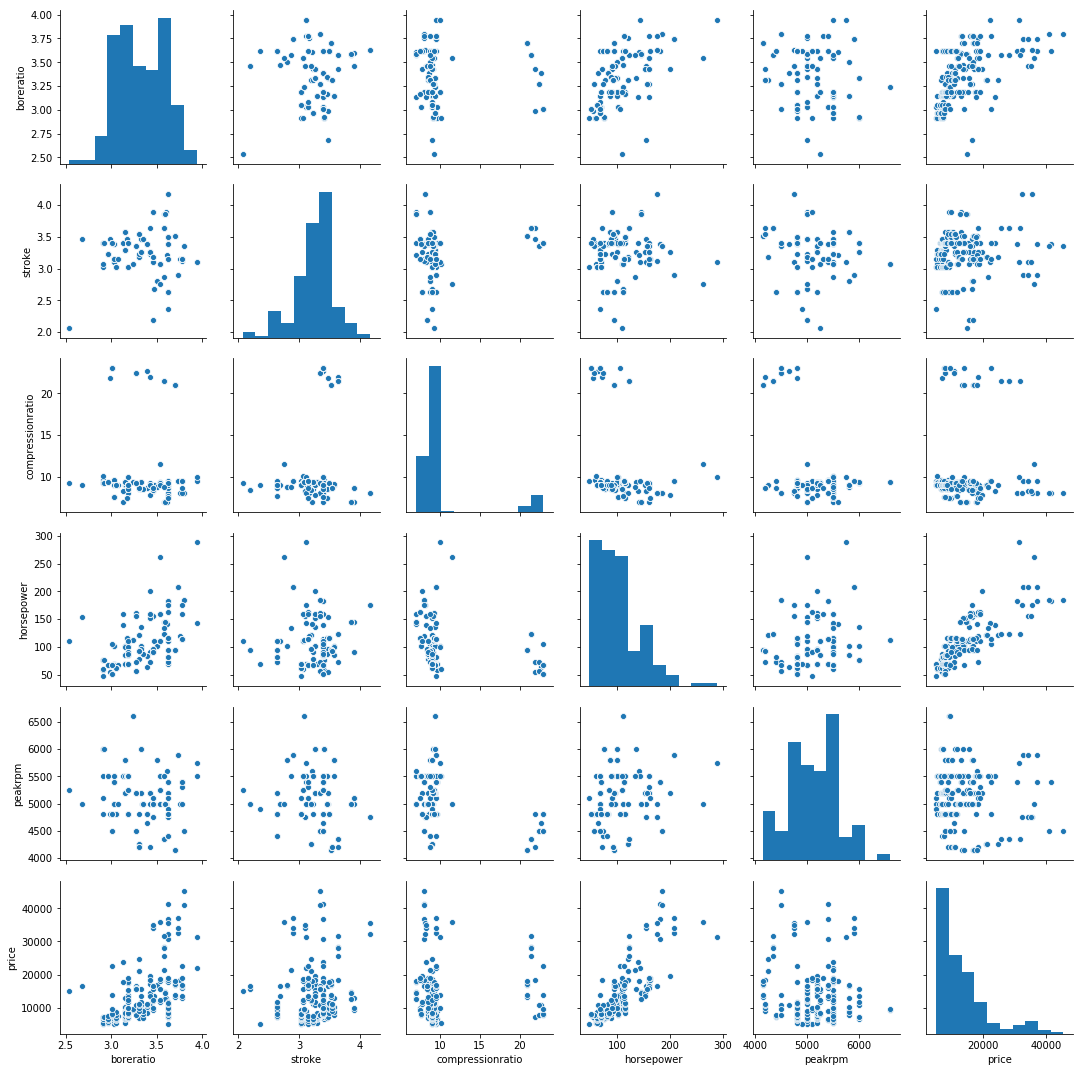

In [20]:
plt.figure(figsize=(80, 40))

num = carprice[["boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "price"]]

sns.pairplot(num)
plt.show()

#### Visualising Categorical Variables

As we have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

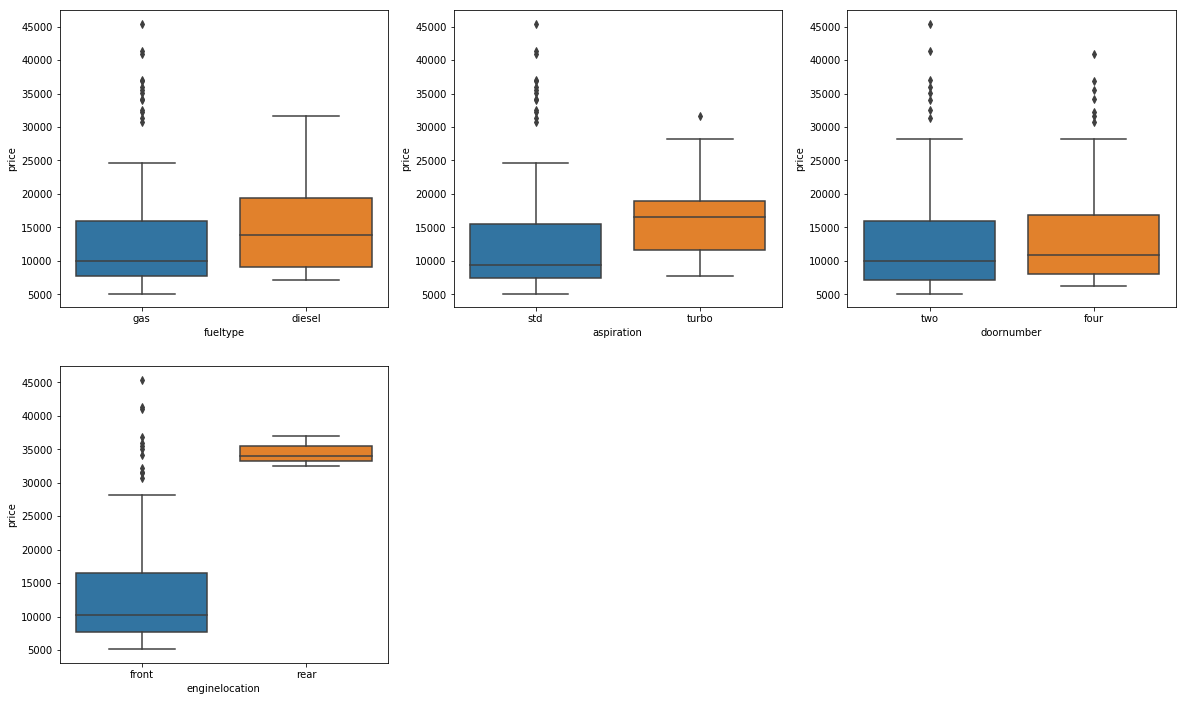

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)

plt.show()

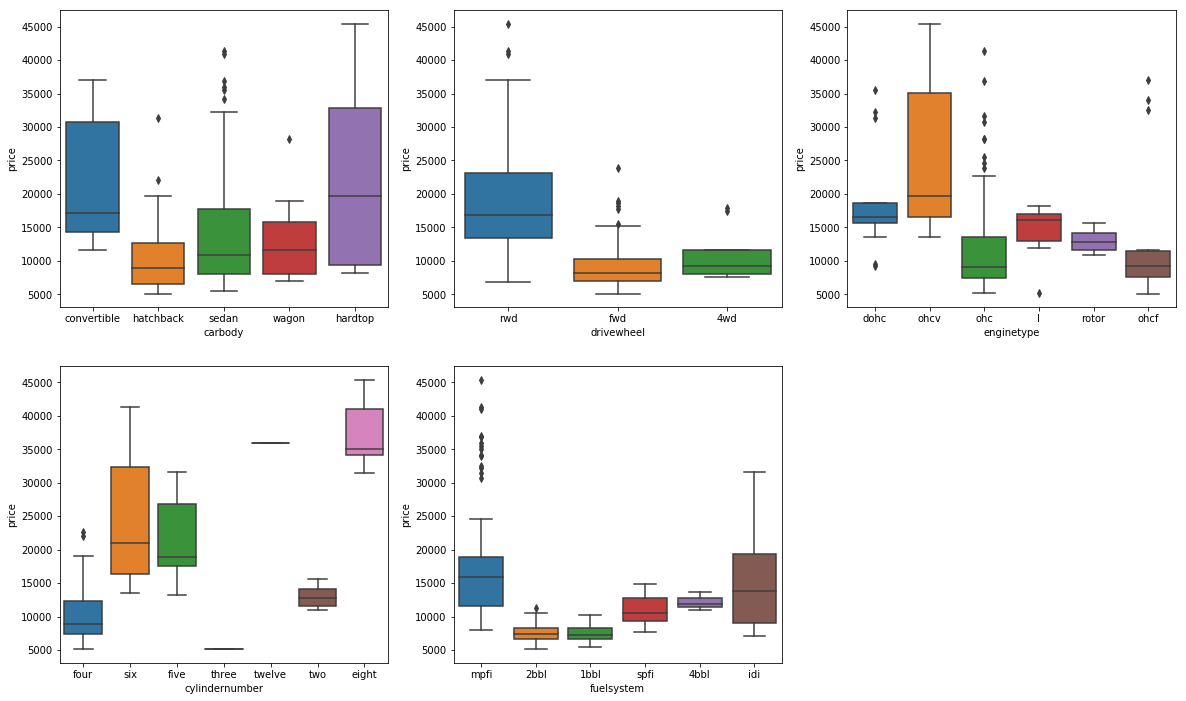

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)

plt.show()

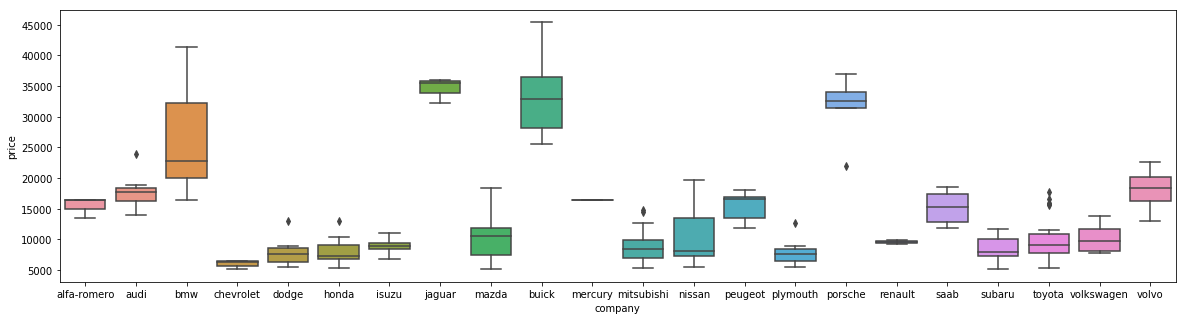

In [23]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'company', y = 'price', data = carprice)
plt.show()

## Step 3: Data Preparation


### Dummy Variables

In [24]:
#Converting variables with 2 levels to numerical variables
carprice['fueltype'] = carprice['fueltype'].map({'gas': 1, 'diesel': 0})
carprice['aspiration'] = carprice['aspiration'].map({'turbo': 1, 'std': 0})
carprice['doornumber'] = carprice['doornumber'].map({'four': 1, 'two': 0})
carprice['enginelocation'] = carprice['enginelocation'].map({'front': 1, 'rear': 0})

In [25]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,1,0,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,0,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,0,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,1,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,1,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [26]:
#Creating dummy variables who are having more than 2 levels to numerical variables

dummy_cb = pd.get_dummies(carprice['carbody'], drop_first = True)
dummy_dw = pd.get_dummies(carprice['drivewheel'], drop_first = True)
dummy_et = pd.get_dummies(carprice['enginetype'], drop_first = True)
dummy_cn = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
dummy_fs = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
dummy_c = pd.get_dummies(carprice['company'], drop_first = True)

In [27]:
# Add the results to the original housing dataframe
carprice1 = pd.concat([carprice, dummy_cb, dummy_dw, dummy_et, dummy_cn, dummy_fs, dummy_c], axis = 1)

# Now let's see the head of our dataframe.
carprice1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,0,0,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,1,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Dropping original variables associated with dummy variables
carprice1 = carprice1.drop(['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'company'], axis=1)

In [29]:
carprice1.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


### Derived Metrics

In [30]:
#Total MPG
carprice1['tmpg'] =  round((carprice1[['citympg', 'highwaympg']].mean(axis=1)), 2)

In [31]:
#Stroke to Bore Ratio
carprice1['stroke_ratio'] =  round((carprice1['stroke'] / carprice1['boreratio']), 2)

In [32]:
carprice1.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,tmpg,stroke_ratio
0,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,24.0,0.77
1,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,24.0,0.77
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,22.5,1.29
3,2,1,0,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,27.0,1.07
4,2,1,0,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,20.0,1.07


In [33]:
#Dropping original variables associated with dummy variables
carprice1 = carprice1.drop(['citympg', 'highwaympg', 'stroke', 'boreratio'], axis=1)

In [34]:
carprice1.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,tmpg,stroke_ratio
0,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,24.0,0.77
1,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,24.0,0.77
2,1,1,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,22.5,1.29
3,2,1,0,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,27.0,1.07
4,2,1,0,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,20.0,1.07


In [35]:
carprice1.to_csv('car_new.csv')

## Step 4: Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(carprice1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and numerical quantity
num_vars = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'tmpg', 'stroke_ratio', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,tmpg,stroke_ratio
122,0.6,1.0,0.0,1.0,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,...,1,0,0,0,0,0,0,0,0.534247,0.696970
125,1.0,1.0,0.0,0.0,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,1,0,0,0,0,0,0,0.219178,0.242424
166,0.6,1.0,0.0,0.0,1.0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,1,0,0,0.342466,0.484848
1,1.0,1.0,0.0,0.0,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0.246575,0.212121
199,0.2,1.0,1.0,1.0,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0.123288,0.363636


### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('fueltype', False, 9),
 ('aspiration', False, 26),
 ('doornumber', False, 44),
 ('enginelocation', True, 1),
 ('wheelbase', False, 11),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('compressionratio', False, 6),
 ('horsepower', False, 14),
 ('peakrpm', False, 3),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('fwd', False, 45),
 ('rwd', False, 42),
 ('l', False, 39),
 ('ohc', False, 27),
 ('ohcf', True, 1),
 ('ohcv', False, 43),
 ('rotor', False, 29),
 ('five', False, 8),
 ('four', False, 5),
 ('six', False, 4),
 ('three', False, 28),
 ('twelve', False, 48),
 ('two', False, 37),
 ('2bbl', False, 50),
 ('4bbl', False, 13),
 ('idi', False, 7),
 ('mpfi', False, 38),
 ('spfi', False, 36),
 ('audi', False, 24),
 ('bmw', True, 1),
 ('buick', False, 35),
 ('chevrolet', False, 19),
 ('dodge', False, 16),
 ('honda', False, 15),
 (

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'ohcf', 'bmw', 'peugeot', 'renault', 'subaru'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mpfi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'porsche', 'saab', 'toyota', 'volkswagen', 'volvo', 'tmpg',
       'stroke_ratio'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Step 5: Building a linear model

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.12e-67
Time:                        21:25:51   Log-Likelihood:                 194.97
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     133   BIC:                            -340.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1346      0.035      3.

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,inf
6,ohcf,inf
10,subaru,inf
4,curbweight,11.980000
2,carlength,5.830000
5,enginesize,5.520000
3,carwidth,5.080000
8,peugeot,1.340000
7,bmw,1.150000
9,renault,1.030000


In [50]:
#Dropping engine location column
X_train_new = X_train_rfe.drop(["enginelocation"], axis = 1)

Rebuilding the model

In [51]:
# Adding a constant variable 
import statsmodels.api as sm1 
X_train_lm1 = sm1.add_constant(X_train_new)

In [52]:
lm1 = sm1.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [53]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.12e-67
Time:                        21:25:51   Log-Likelihood:                 194.97
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     133   BIC:                            -340.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1599      0.017     -9.328      0.0

In [54]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,subaru,12.07
5,ohcf,12.01
3,curbweight,11.98
0,const,10.21
1,carlength,5.83
4,enginesize,5.52
2,carwidth,5.08
7,peugeot,1.34
6,bmw,1.15
8,renault,1.03


In [55]:
#Dropping subaru column
X_train_new = X_train_new.drop(['subaru'], axis=1)

In [56]:
#Rebuilding the model

# Adding a constant variable 
import statsmodels.api as sm2  
X_train_lm2 = sm2.add_constant(X_train_new)

lm2 = sm2.OLS(y_train,X_train_lm2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.22e-58
Time:                        21:25:51   Log-Likelihood:                 169.47
No. Observations:                 143   AIC:                            -320.9
Df Residuals:                     134   BIC:                            -294.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1506      0.020     -7.393      0.0

In [57]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,11.96
0,const,10.16
1,carlength,5.82
4,enginesize,5.21
2,carwidth,5.02
7,peugeot,1.34
6,bmw,1.14
8,renault,1.03
5,ohcf,1.02


In [58]:
#Dropping curb weight column
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [59]:
#Rebuilding the model

# Adding a constant variable 
import statsmodels.api as sm3  
X_train_lm3 = sm3.add_constant(X_train_new)

lm3 = sm3.OLS(y_train,X_train_lm3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.04e-54
Time:                        21:25:51   Log-Likelihood:                 156.00
No. Observations:                 143   AIC:                            -296.0
Df Residuals:                     135   BIC:                            -272.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1771      0.022     -8.200      0.0

In [60]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.53
2,carwidth,4.60
1,carlength,4.13
3,enginesize,2.70
6,peugeot,1.24
5,bmw,1.14
4,ohcf,1.02
7,renault,1.01


In [61]:
#Dropping car width column because we were having high VIF value after dropping const column
X_train_new = X_train_new.drop(['carwidth'], axis=1)

In [62]:
#Rebuilding the model without car width

# Adding a constant variable 
import statsmodels.api as sm4  
X_train_lm4 = sm4.add_constant(X_train_new)

lm4 = sm4.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     97.30
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.87e-47
Time:                        21:25:51   Log-Likelihood:                 136.09
No. Observations:                 143   AIC:                            -258.2
Df Residuals:                     136   BIC:                            -237.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1354      0.024     -5.726      0.0

In [63]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.71
1,carlength,2.41
2,enginesize,2.14
5,peugeot,1.23
4,bmw,1.07
3,ohcf,1.02
6,renault,1.01


In [64]:
#Dropping car length column because we were having high VIF value after dropping const column
X_train_new = X_train_new.drop(['carlength'], axis=1)

In [65]:
#Rebuilding the model

# Adding a constant variable 
import statsmodels.api as sm5  
X_train_lm5 = sm5.add_constant(X_train_new)

lm5 = sm5.OLS(y_train,X_train_lm5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.24e-44
Time:                        21:25:52   Log-Likelihood:                 128.46
No. Observations:                 143   AIC:                            -244.9
Df Residuals:                     137   BIC:                            -227.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0651      0.016     -4.029      0.0

In [66]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.69
1,enginesize,1.07
3,bmw,1.06
2,ohcf,1.02
4,peugeot,1.02
5,renault,1.00


In [67]:
X_train_new.columns

Index(['const', 'enginesize', 'ohcf', 'bmw', 'peugeot', 'renault'], dtype='object')

In [68]:
#Now Dropping const column
X_train_new = X_train_new.drop(['const'], axis=1)

In [69]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.25
2,bmw,1.11
3,peugeot,1.07
1,ohcf,1.05
4,renault,1.02


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [70]:
y_train_price = lm5.predict(X_train_lm5)

In [71]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

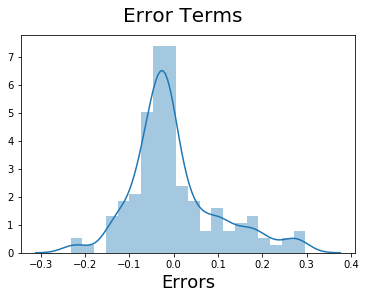

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [73]:
num_vars = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'tmpg', 'stroke_ratio', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [74]:
y_test = df_test.pop('price')
X_test = df_test

In [75]:
X_train_new.columns

Index(['enginesize', 'ohcf', 'bmw', 'peugeot', 'renault'], dtype='object')

In [76]:
X_test.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mpfi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'tmpg', 'stroke_ratio'],
      dtype='object')

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm5.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm5.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

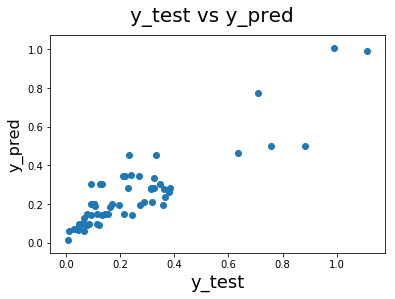

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7921334289949674

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [82]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.011110101312364777
r_square_value : 0.7921334289949674
